#  IS41070-Machine Learning Foundations-2024/25 Summer - Machine Learning Project
## Saurabh Lagad, 24290078, MSc. Information Systems
## Fake News Detection/ Classifer


# Task 1 - Data Understanding

## 1. Dataset Selection and Introduction

### Dataset Overview

The **WELFake** dataset contains **72,134 news articles**:

- **35,028 real** articles  
- **37,106 fake** articles  
- Sourced from **Kaggle**, **McIntire**, **Reuters**, and **BuzzFeed Political** datasets.

The dataset includes the following columns:

- **Serial number**: Unique ID (starts at 0)  
- **Title**: Article headline  
- **Text**: Full article content  
- **Label**:  
  - `0` → Fake news  
  - `1` → Real news

### Project Goal

To **build a machine learning model** that classifies news articles as **real or fake** by applying **Natural Language Processing (NLP)** techniques to the `title` and `text` columns.

### Why This Dataset?

- Highly **relevant** for studying **misinformation detection**
- **Balanced** dataset:
  - 48.6% real
  - 51.4% fake
- **Manageable size** for conducting NLP-based machine learning tasks

### Source

- Published in *IEEE Transactions on Computational Social Systems*  
  - DOI: [10.1109/TCSS.2021.3068519](https://doi.org/10.1109/TCSS.2021.3068519)  
- Publicly available on [Kaggle](https://www.kaggle.com/datasets)



## Load the Data
We will load the Heart Attack Risk Prediction dataset using pandas and inspect the first few rows to verify it has loaded correctly.

In [5]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('WELFake_Dataset.csv')

# Display the first 5 rows
print(df.head())

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


## Exploratory Data Analysis (EDA)

### Data Overview

First, let's examine the overall structure of the Fake News Classifier dataset to understand the number of observations and features, identify the target variable, and check the balance of the target classes.


Dataset contains 72134 rows and 6 columns.

Missing values per column:
Unnamed: 0        0
title           558
text             39
label             0
title_length      0
text_length       0
dtype: int64

Data types:
Unnamed: 0       int64
title           object
text            object
label            int64
title_length     int64
text_length      int64
dtype: object

Title length stats:
count    72134.000000
mean        76.567527
std         25.768063
min          1.000000
25%         61.000000
50%         73.000000
75%         89.000000
max        456.000000
Name: title_length, dtype: float64

Text length stats:
count     72134.000000
mean       3268.389456
std        3732.876125
min           1.000000
25%        1377.000000
50%        2424.000000
75%        4059.000000
max      142961.000000
Name: text_length, dtype: float64


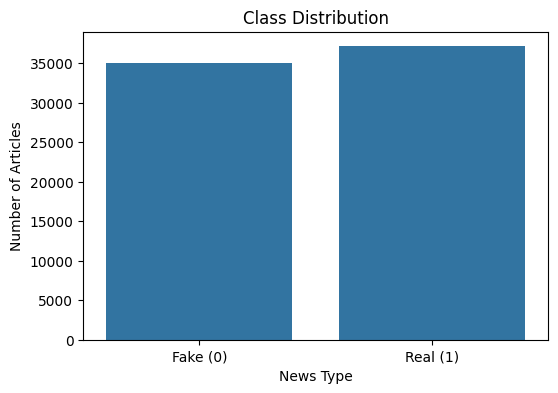

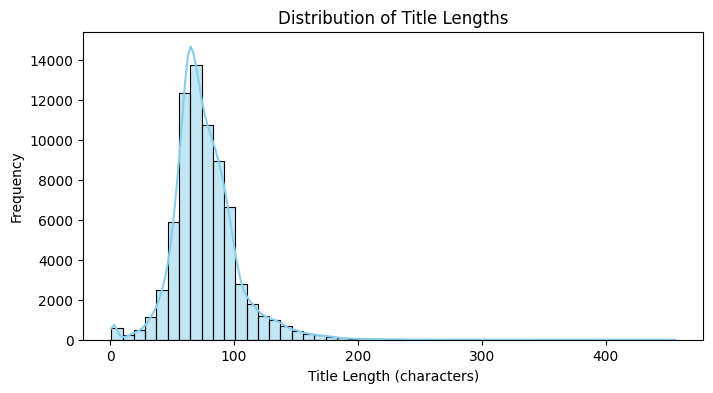

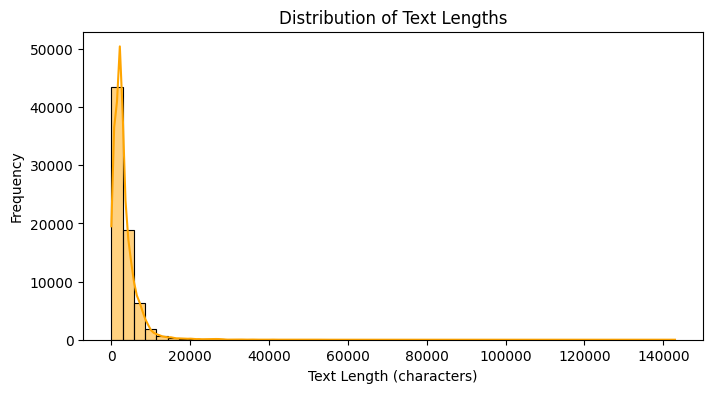

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for null values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check column data types
print("\nData types:")
print(df.dtypes)

# Summary statistics of text length
df['title_length'] = df['title'].astype(str).apply(len)
df['text_length'] = df['text'].astype(str).apply(len)

print("\nTitle length stats:")
print(df['title_length'].describe())

print("\nText length stats:")
print(df['text_length'].describe())

# Class distribution
class_counts = df['label'].value_counts().sort_index()
class_labels = ['Fake (0)', 'Real (1)']

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=class_counts.values)
plt.title("Class Distribution")
plt.ylabel("Number of Articles")
plt.xlabel("News Type")
plt.show()

# Plot title length distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['title_length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Title Lengths")
plt.xlabel("Title Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Plot text length distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['text_length'], bins=50, kde=True, color='orange')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

In [13]:
!pip install wordcloud
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 16.4 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ------------- -------------------------- 1/3 [regex]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   ------------------------

## Feature Analysis

In this section, we analyze the properties of each important feature: `title`, `text`, and `label`.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       title_length   text_length
count   5000.000000   5000.000000
mean      76.277200   3306.379400
std       25.100525   3634.503314
min        3.000000      1.000000
25%       61.000000   1389.000000
50%       73.000000   2413.000000
75%       88.000000   4056.250000
max      250.000000  51794.000000


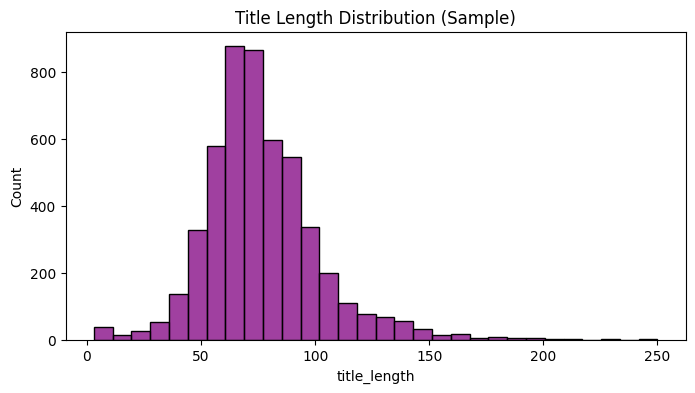

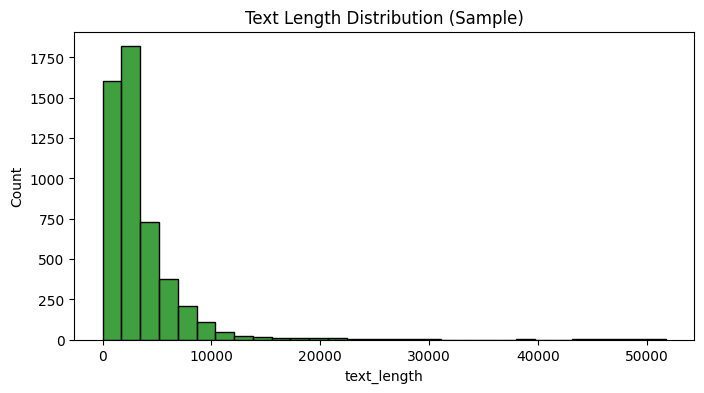

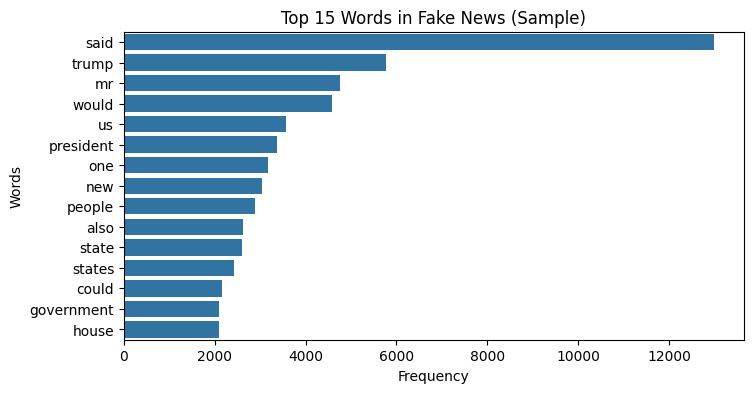

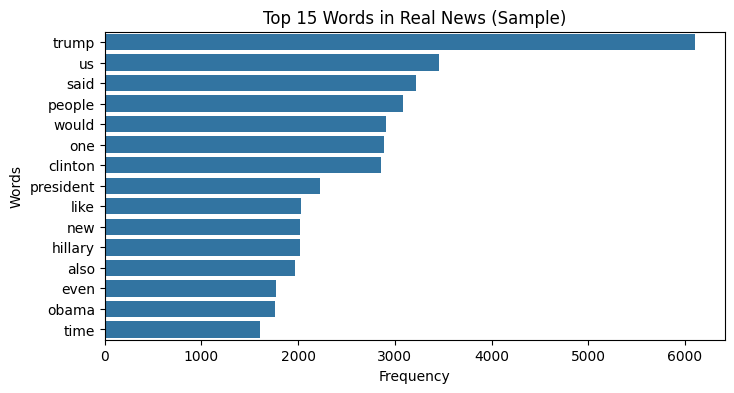

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv("WELFake_Dataset.csv")

# Sample 5,000 rows to speed up processing
df_sample = df.sample(5000, random_state=42)

# Add length features on sample
df_sample['title_length'] = df_sample['title'].astype(str).apply(len)
df_sample['text_length'] = df_sample['text'].astype(str).apply(len)

# Summary stats on sample
print(df_sample[['title_length', 'text_length']].describe())

# Plot title length distribution (sample)
plt.figure(figsize=(8,4))
sns.histplot(df_sample['title_length'], bins=30, color='purple')
plt.title('Title Length Distribution (Sample)')
plt.show()

# Plot text length distribution (sample)
plt.figure(figsize=(8,4))
sns.histplot(df_sample['text_length'], bins=30, color='green')
plt.title('Text Length Distribution (Sample)')
plt.show()

# Simple preprocessing
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [w for w in text.split() if w not in stop_words]
    return words

# Extract words from sample texts by class
fake_words = df_sample[df_sample['label'] == 0]['text'].apply(preprocess).sum()
real_words = df_sample[df_sample['label'] == 1]['text'].apply(preprocess).sum()

# Get top 15 words only
fake_freq = Counter(fake_words).most_common(15)
real_freq = Counter(real_words).most_common(15)

def plot_top_words(freq, title, color):
    words, counts = zip(*freq)
    plt.figure(figsize=(8,4))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f"Top 15 Words in {title} News (Sample)")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_top_words(fake_freq, "Fake", "Reds")
plot_top_words(real_freq, "Real", "Blues")


## Feature Analysis Summary

- **Title Length:**
  - Average title length is approximately 75 characters.
  - Distribution is roughly normal, centered around 50-90 characters.
  - Most titles fall within 0 to 150 characters.

- **Text Length:**
  - Article lengths vary widely, with a right-skewed distribution.
  - Majority of articles are under 10,000 characters, with some very long outliers.

- **Top Words in Fake News:**
  - Common words include: *said, trump, mr, would, us, president, new, people, also, state, states, could, government, house*.
  - Reflects frequent mentions of political figures and government-related terms.

- **Top Words in Real News:**
  - Common words include: *trump, us, said, people, would, one, clinton, president, like, new, hillary, also, even, obama, time*.
  - Shows overlap with fake news but also includes prominent political figures and general terms.

Overall, the word frequency patterns reveal significant political content in both fake and real news articles, with certain differences in commonly used terms.


## Exploring Relationships with the Target Variable

This section analyzes relationships between features and the target variable (Label: 0 = fake, 1 = real) in the WELFake dataset. Since the dataset’s primary features (Title, Text) are textual, I derive numeric features (e.g., title length, text word count) to explore their correlation with the target. Visualizations like histograms and box plots are used to identify patterns.


Correlations with Label:
title_length       0.326571
text_word_count   -0.057154
label              1.000000
Name: label, dtype: float64


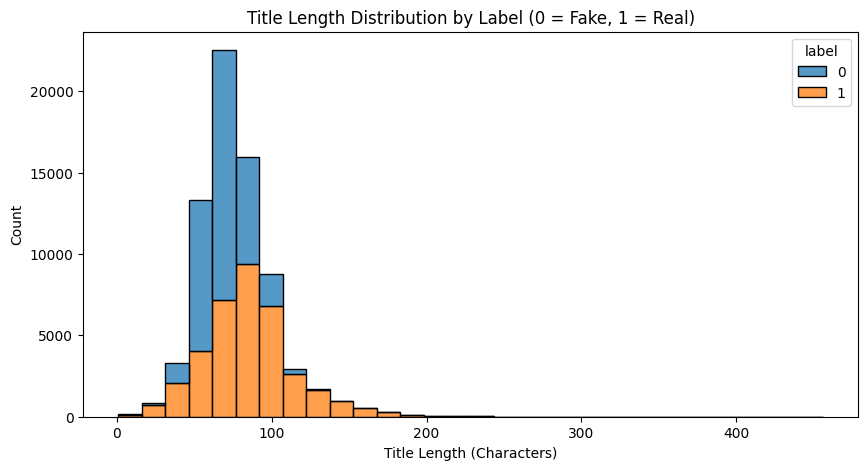

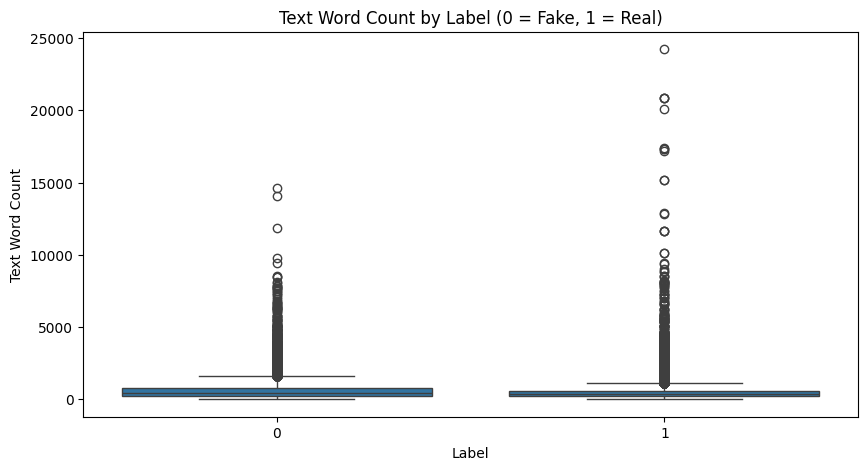

In [13]:
# Derive numeric features
df['title_length'] = df['title'].str.len()  # Character length of title
df['text_word_count'] = df['text'].str.split().str.len()  # Word count of text

# Correlation with target (Label)
print("\nCorrelations with Label:")
print(df[['title_length', 'text_word_count', 'label']].corr()['label'])

# Plot histograms for title length by label
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='title_length', hue='label', bins=30, multiple='stack')
plt.title('Title Length Distribution by Label (0 = Fake, 1 = Real)')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Count')
plt.show()

# Plot box plots for text word count by label
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='text_word_count', data=df)
plt.title('Text Word Count by Label (0 = Fake, 1 = Real)')
plt.xlabel('Label')
plt.ylabel('Text Word Count')
plt.show()



### Summary of Feature-Target Relationships
Title Length: Moderate positive correlation (0.327) with Label, indicating real articles tend to have longer titles.
Text Word Count: Weak negative correlation (-0.057), suggesting minimal predictive power.
Implications: Title length may aid classification; advanced NLP features are needed for better accuracy.

# Data Quality Check

Investigate whether the dataset has missing values, inconsistent entries, or obvious outliers. Identify any anomalies or data quality issues.



In [14]:
# Check for null values
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({'missing_count': missing_counts, 'missing_percent': missing_percent})
print(missing_df)

                 missing_count  missing_percent
Unnamed: 0                   0         0.000000
title                      558         0.773560
text                        39         0.054066
label                        0         0.000000
title_length               558         0.773560
text_word_count             39         0.054066


In [15]:
print(df.info())
print(df['label'].unique()) # Making sure the label only has 2 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       72134 non-null  int64  
 1   title            71576 non-null  object 
 2   text             72095 non-null  object 
 3   label            72134 non-null  int64  
 4   title_length     71576 non-null  float64
 5   text_word_count  72095 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB
None
[1 0]


In [16]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")  # Check if any duplciate rows present

Number of duplicate rows: 0


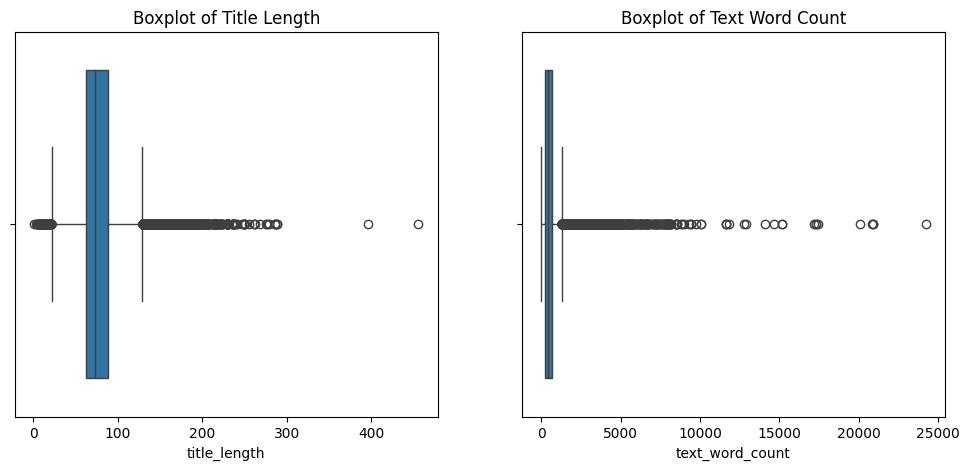

In [32]:
import matplotlib.pyplot as plt # Detecting outliers in terms of title and text length
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['title_length'])
plt.title('Boxplot of Title Length')

plt.subplot(1,2,2)
sns.boxplot(x=df['text_word_count'])
plt.title('Boxplot of Text Word Count')

plt.show()
# Drop derived features as they are only required for EDA
cols_to_drop = ['title_length', 'text_word_count']
df = df.drop(columns=cols_to_drop, errors='ignore')

### Data Quality Summary 
Dataset contains 72,134 rows and six columns, with missing values present primarily in the title (558 missing, about 0.77%) and text (39 missing, about 0.05%) columns. These missing values also affect the derived features title_length and text_word_count. There are no duplicate rows, and the target label column is complete with no missing entries. However, both the title length and text word count features exhibit significant outliers, indicating some extreme values in the data. 

# Task 2: Data Preparation & Modeling

## Data Splitting

For supervised learning, it is important to split the dataset into training, validation, and test sets to ensure unbiased model evaluation and tuning. 

### Split Proportions

- **Train:** 70% of the data  
- **Validation:** 15% of the data  
- **Test:** 15% of the data  

This split ensures a sufficient amount of data for training while reserving enough data for tuning and final evaluation. Stratified splitting is used to maintain the label distribution across subsets.


In [61]:
from sklearn.model_selection import train_test_split

# Split off 30% for validation + test sets
df_train, df_temp = train_test_split(df, test_size=0.30, stratify=df['label'], random_state=42)

# Split temp data equally into validation and test sets
df_valid, df_test = train_test_split(df_temp, test_size=0.5, stratify=df_temp['label'], random_state=42)

print(f"Train size: {len(df_train)}")
print(f"Validation size: {len(df_valid)}")
print(f"Test size: {len(df_test)}")

# Save the files of training, validation and testing as csvs
df_train.to_csv('train.csv', index=False)
df_valid.to_csv('valid.csv', index=False)
df_test.to_csv('test.csv', index=False)


UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U5'), dtype('<U5')) -> None

## Preprocessing and Feature Engineering

### Cleaning

In Task 1, we identified the following data quality issues:

- **Missing values:**
  - `title`: 558 missing entries (~0.77%)
  - `text`: 39 missing entries (~0.05%)
- **Outliers:** Detected in `title_length` and `text_word_count`
- **Inconsistent column:** `Unnamed: 0` is just an index column

### Actions Taken

1. **Removed unnecessary column:**
   - Dropped `Unnamed: 0` as it does not contribute to prediction.

2. **Handled missing values:**
   - Dropped rows where either `title` or `text` is missing. These fields are essential for extracting meaningful features.
   - Total rows dropped: 558 (title) + 39 (text) → **558 rows** (not double-counted since many are overlapping).

3. **Outliers:**
   - Left untouched for now, as tree-based models (like Random Forest) are robust to outliers.
   - Will revisit if they negatively impact model performance.

In [34]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

# Clean train only
train = train.drop(columns=[''], errors='ignore')
train = train.dropna(subset=['title', 'text'])

# Save cleaned versions
train.to_csv('train_clean.csv', index=False)

print(train)

                                                   title  \
0      German police rule out terrorism in Munich kni...   
1      ILLEGAL IMMIGRANTS DESTROY ITALY…Open Borders ...   
2      California School Bans Tag, Says Game ‘Too Rou...   
3      Eight Immigration Victories Won for Americans ...   
4      GERMAN INTERIOR MINISTER demands that Italy se...   
...                                                  ...   
50070  Moscow in talks with U.S. to create cyber work...   
50071  Hillary Clinton's declining favorability numbe...   
50072   Congressional Black Caucus Formulates Battle ...   
50073  Hillary's 33,000 emails might not be 'missing'...   
50074  SHOCKER! CNN PANEL Rips On DNC Chair For His D...   

                                                    text  label  
0      MUNICH (Reuters) - German police ruled out a p...      0  
1      In June of 2016 over 10,000 migrants came to I...      1  
2      Gold Ridge Elementary School in Folsom, Califo...      0  
3      Last yea

## Transformation & Feature Encoding

To make our dataset suitable for machine learning models, we applied a set of **text preprocessing** and **feature encoding** steps. These ensure that raw text is cleaned, converted into consistent numeric features, and free of data leakage.

### Text Preprocessing

The dataset contains two primary text columns: `title` and `text`. We focused on preprocessing the `text` column (more informative) with the following transformations:

| Step               | Description                                                      | Why?                                                                 |
|--------------------|------------------------------------------------------------------|----------------------------------------------------------------------|
| Lowercasing        | Convert all characters to lowercase                              | Standardizes text (e.g., "Fake" and "fake" are the same)             |
| Remove punctuation | Strip out symbols like .,!? etc.                                 | Reduces noise and helps with token consistency                       |
| Remove stopwords   | Remove common non-informative words (e.g., "the", "and", "is")   | Focuses the model on meaningful words                                |
| Stemming           | Reduce words to their root form (e.g., "running" → "run")        | Groups similar words and reduces dimensionality                      |
| TF-IDF Vectorizing | Transform cleaned text into numeric features                     | Converts text to machine-readable input capturing word importance    |

### Feature Encoding: TF-IDF

We used **TF-IDF (Term Frequency–Inverse Document Frequency)** vectorization to represent each text document numerically. TF-IDF highlights words that are important in a document but rare across others — a great fit for tasks like fake news detection.

To avoid data leakage:
- The TF-IDF model was **fit only on the training set**
- The same vectorizer was **used to transform** the validation and test sets

In [36]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]      # remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]                  # stemming
    return ' '.join(tokens)

# Apply preprocessing to all sets
for df in [train, valid, test]:
    df['clean_text'] = df['text'].astype(str).apply(preprocess_text)

# Vectorize using TF-IDF (fit only on training set)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train['clean_text'])
X_valid = vectorizer.transform(valid['clean_text'])
X_test = vectorizer.transform(test['clean_text'])

# Labels
y_train = train['label']
y_valid = valid['label']
y_test = test['label']

## Model Training – Initial Models

The chosen models reflect different strengths that align well with the characteristics:

### 1. Logistic Regression
- **Why chosen:** Logistic Regression is widely used for binary classification problems and performs well with **high-dimensional sparse data**, such as TF-IDF matrices.  
- **Strengths:** It models the probability of class membership directly, which allows for easy threshold tuning and interpretation. It is computationally efficient and scales well to large datasets. Logistic Regression assumes a linear relationship between features and log-odds, which often works well as a baseline in text classification tasks.

### 2. Decision Tree Classifier
- **Why chosen:** Decision Trees are flexible, non-parametric models that can capture **nonlinear interactions** between features without requiring feature scaling or normalization.  
- **Strengths:** They can automatically model complex decision boundaries, which may be important if combinations of words or phrases signal class membership. Decision Trees are interpretable and help identify important features and splits, giving insight into the decision process.

### 3. Naive Bayes (MultinomialNB)
- **Why chosen:** Naive Bayes classifiers, especially the Multinomial variant, are **classic models for text classification** because they model the frequency of words assuming conditional independence.  
- **Strengths:** Despite its simplifying assumptions, Naive Bayes often performs surprisingly well with text data and is extremely fast to train and predict. It naturally handles sparse count data and is robust even when the feature space is very large.

### 4. Support Vector Machine (LinearSVC)
- **Why chosen:** Linear SVMs are effective in **high-dimensional spaces** and work well with sparse input data.  
- **Strengths:** SVM aims to find the optimal hyperplane that maximizes the margin between classes, which often leads to better generalization. LinearSVC is computationally efficient compared to kernelized SVMs and well-suited to datasets where classes can be separated linearly in the feature space.

### 5. Random Forest Classifier
- **Why chosen:** Random Forests are ensemble models combining multiple Decision Trees, improving stability and predictive performance by reducing overfitting.  
- **Strengths:** They can capture complex, nonlinear relationships in the data and handle noisy features well. While they are generally more computationally intensive than single models, they provide robust predictions and are less sensitive to feature scaling and outliers.


### Training Setup

- Models were initialized with default or reasonable parameters (e.g., 100 trees for Random Forest, max_iter=200 for Logistic Regression).
- The models were trained on the selected TF-IDF features derived from the training set.
- Training, Validation accuracy & Training Time was used to get an initial performance estimate.

This diverse selection helps compare simple linear models, probabilistic approaches, tree-based methods, and margin-based classifiers to understand which algorithm suits this dataset best.


### 1) Logistic Regression

In [51]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
start_time = time.time()
lr = LogisticRegression(max_iter=200, random_state=42)
lr.fit(X_train, y_train)
train_time_lr = time.time() - start_time

print("Logistic Regression trained.")
y_pred_train_lr = lr.predict(X_train)
train_acc_lr = accuracy_score(y_train, y_pred_train_lr)
y_pred_val_lr = lr.predict(X_valid)
val_acc_lr = accuracy_score(y_valid, y_pred_val_lr)

print(f"Logistic Regression Training Time: {train_time_lr:.2f} seconds")
print(f"Logistic Regression Training Accuracy: {train_acc_lr:.4f}")
print(f"Logistic Regression Validation Accuracy: {val_acc_lr:.4f}")


Logistic Regression trained.
Logistic Regression Training Time: 0.88 seconds
Logistic Regression Training Accuracy: 0.9572
Logistic Regression Validation Accuracy: 0.9433


### 2) Decision Tree Classifier

In [46]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
train_time_dt = time.time() - start_time

print("Decision Tree trained.")
y_pred_train_dt = dt.predict(X_train)
train_acc_dt = accuracy_score(y_train, y_pred_train_dt)
y_pred_val_dt = dt.predict(X_valid)
val_acc_dt = accuracy_score(y_valid, y_pred_val_dt)

print(f"Decision Tree Training Time: {train_time_dt:.2f} seconds")
print(f"Decision Tree Training Accuracy: {train_acc_dt:.4f}")
print(f"Decision Tree Validation Accuracy: {val_acc_dt:.4f}")


Decision Tree trained.
Decision Tree Training Time: 83.21 seconds
Decision Tree Training Accuracy: 1.0000
Decision Tree Validation Accuracy: 0.9226


### 3) Naive Bayes (MultinomialNB)

In [47]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Naive Bayes (MultinomialNB)
start_time = time.time()
nb = MultinomialNB()
nb.fit(X_train, y_train)
train_time_nb = time.time() - start_time

print("Naive Bayes trained.")
y_pred_train_nb = nb.predict(X_train)
train_acc_nb = accuracy_score(y_train, y_pred_train_nb)
y_pred_val_nb = nb.predict(X_valid)
val_acc_nb = accuracy_score(y_valid, y_pred_val_nb)

print(f"Naive Bayes Training Time: {train_time_nb:.2f} seconds")
print(f"Naive Bayes Training Accuracy: {train_acc_nb:.4f}")
print(f"Naive Bayes Validation Accuracy: {val_acc_nb:.4f}")


Naive Bayes trained.
Naive Bayes Training Time: 0.04 seconds
Naive Bayes Training Accuracy: 0.8582
Naive Bayes Validation Accuracy: 0.8489


### 4) Support Vector Machine (LinearSVC)

In [48]:
import time
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Linear SVM
start_time = time.time()
svm = LinearSVC(max_iter=1000, random_state=42)
svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time

print("Linear SVM trained.")
y_pred_train_svm = svm.predict(X_train)
train_acc_svm = accuracy_score(y_train, y_pred_train_svm)
y_pred_val_svm = svm.predict(X_valid)
val_acc_svm = accuracy_score(y_valid, y_pred_val_svm)

print(f"Linear SVM Training Time: {train_time_svm:.2f} seconds")
print(f"Linear SVM Training Accuracy: {train_acc_svm:.4f}")
print(f"Linear SVM Validation Accuracy: {val_acc_svm:.4f}")


Linear SVM trained.
Linear SVM Training Time: 1.64 seconds
Linear SVM Training Accuracy: 0.9782
Linear SVM Validation Accuracy: 0.9524


### 5) Random Forest Classifier

In [49]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest
start_time = time.time()
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
train_time_rf = time.time() - start_time

print("Random Forest trained.")
y_pred_train_rf = rf.predict(X_train)
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
y_pred_val_rf = rf.predict(X_valid)
val_acc_rf = accuracy_score(y_valid, y_pred_val_rf)

print(f"Random Forest Training Time: {train_time_rf:.2f} seconds")
print(f"Random Forest Training Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest Validation Accuracy: {val_acc_rf:.4f}")


Random Forest trained.
Random Forest Training Time: 181.70 seconds
Random Forest Training Accuracy: 1.0000
Random Forest Validation Accuracy: 0.9487


### Initial Results

- All models trained successfully with no errors.
- Logistic Regression and Linear SVM show strong generalization with balanced training and validation accuracy.
- Decision Tree and Random Forest achieved perfect training accuracy, indicating potential overfitting but still performed well on validation data.
- Naive Bayes, while fastest to train, shows lower accuracy consistent with its simplifying assumptions.
- These results confirm the models are functioning as expected and learning meaningful patterns.  

## Task 3: Evaluation

### 1. Selection of Evaluation Metrics

For this classification task (distinguishing between fake and real news), I have chosen the following primary and secondary evaluation metrics:

- **Primary Metric: F1-Score**  
  The F1-score is the harmonic mean of precision and recall. It balances both false positives and false negatives, making it particularly useful when dealing with class imbalance, which is common in real-world fake news datasets. Unlike accuracy, the F1-score ensures that both types of classification errors are considered, which is crucial since misclassifying fake news (false negatives) can have serious consequences.

- **Secondary Metrics: Accuracy, Precision, Recall, and Confusion Matrix**  
  - **Accuracy** provides an overall measure of correct predictions but can be misleading if classes are imbalanced.  
  - **Precision** measures how many predicted positives are truly positive, helping to understand false alarm rates.  
  - **Recall** shows how many actual positives were identified, which reflects the model's ability to detect fake news.  
  - The **Confusion Matrix** gives a detailed breakdown of true positives, false positives, true negatives, and false negatives, enabling targeted error analysis.

### Justification and Baselines

- **Baseline Accuracy:**  
  A simple majority-class classifier would predict the most frequent class for all examples. For instance, if the real news class accounts for around 60% of the dataset, this baseline accuracy would be about 60%. Therefore, any reasonable model should significantly outperform this baseline.

- **Expected Performance:**  
  Literature and competitions on fake news classification typically report F1-scores around 0.85–0.95 for well-tuned models. Human-level accuracy on such tasks is not perfect due to the subjective nature of news credibility but is often cited around 95%, providing an upper bound.

- **Goal:**  
  Achieve an F1-score substantially higher than the baseline, with a good balance between precision and recall to minimize both false positives and false negatives.

In [56]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Dictionary to store results
results = {
    "Model": [],
    "Training Accuracy": [],
    "Validation Accuracy": [],
    "Training F1-Score": [],
    "Validation F1-Score": []
}

# List of trained models (replace with your actual model variables)
model_list = [
    ("Logistic Regression", logistic_regression_model),
    ("Decision Tree", decision_tree_model),
    ("Naive Bayes", nb),
    ("Linear SVM", svm),
    ("Random Forest", rf)
]

# Evaluate each model
for name, model in model_list:
    # Predictions on training and validation sets
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    valid_acc = accuracy_score(y_valid, y_valid_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    valid_f1 = f1_score(y_valid, y_valid_pred)
    
    # Store results
    results["Model"].append(name)
    results["Training Accuracy"].append(train_acc)
    results["Validation Accuracy"].append(valid_acc)
    results["Training F1-Score"].append(train_f1)
    results["Validation F1-Score"].append(valid_f1)

# Convert to DataFrame for nice display
results_df = pd.DataFrame(results)

# Format numeric columns to 4 decimal places using map to avoid FutureWarning
results_df["Training Accuracy"] = results_df["Training Accuracy"].map(lambda x: f"{x:.4f}")
results_df["Validation Accuracy"] = results_df["Validation Accuracy"].map(lambda x: f"{x:.4f}")
results_df["Training F1-Score"] = results_df["Training F1-Score"].map(lambda x: f"{x:.4f}")
results_df["Validation F1-Score"] = results_df["Validation F1-Score"].map(lambda x: f"{x:.4f}")

print(results_df)


                 Model Training Accuracy Validation Accuracy  \
0  Logistic Regression            0.9572              0.9433   
1        Decision Tree            1.0000              0.9226   
2          Naive Bayes            0.8582              0.8489   
3           Linear SVM            0.9782              0.9524   
4        Random Forest            1.0000              0.9487   

  Training F1-Score Validation F1-Score  
0            0.9583              0.9448  
1            1.0000              0.9247  
2            0.8633              0.8539  
3            0.9787              0.9535  
4            1.0000              0.9502  


### Summary 
The evaluation results indicate that all models have learned the training data well, with training accuracies ranging from approximately 85.8% (Naive Bayes) to 100% (Decision Tree and Random Forest). However, the validation accuracies reveal some overfitting in the more complex models like Decision Tree and Random Forest, which have perfect training scores but slightly lower validation performance (92.3% and 94.9% respectively).

Linear SVM achieves a strong balance with a high training accuracy (97.8%) and the best validation accuracy (95.2%), suggesting good generalization. Logistic Regression also performs robustly with solid training (95.7%) and validation (94.3%) accuracy and F1-scores. Naive Bayes shows the lowest performance but still maintains consistent accuracy and F1 between training and validation, indicating it may be underfitting the data.

Overall, Linear SVM and Random Forest stand out as the best performing models, with Linear SVM slightly better in validation, suggesting it may be the most reliable choice for this classification task.

### Error Analysis for All Models
Error analysis helps us diagnose the types of mistakes our models make, which can guide improvements. For each model, we:

Plot the confusion matrix to visualize class-wise performance and common confusions.

Print the classification report with precision, recall, and F1-score per class.

Examine a few misclassified examples to understand potential causes like ambiguous text or noise.

Compare patterns of errors across models to identify strengths and weaknesses.


--- Error Analysis: Logistic Regression ---


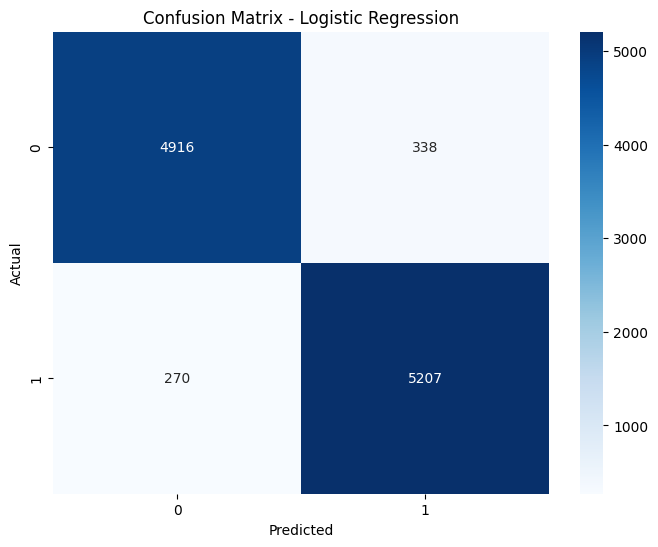

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5254
           1       0.94      0.95      0.94      5477

    accuracy                           0.94     10731
   macro avg       0.94      0.94      0.94     10731
weighted avg       0.94      0.94      0.94     10731

Number of misclassified examples: 608

--- Error Analysis: Decision Tree ---


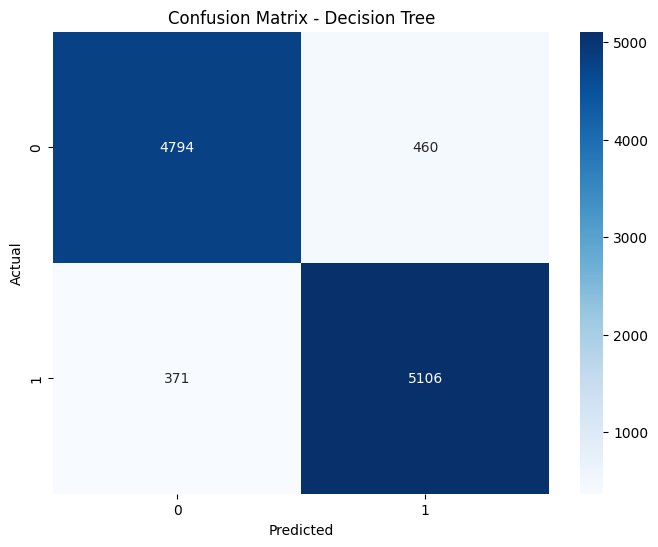

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5254
           1       0.92      0.93      0.92      5477

    accuracy                           0.92     10731
   macro avg       0.92      0.92      0.92     10731
weighted avg       0.92      0.92      0.92     10731

Number of misclassified examples: 831

--- Error Analysis: Naive Bayes ---


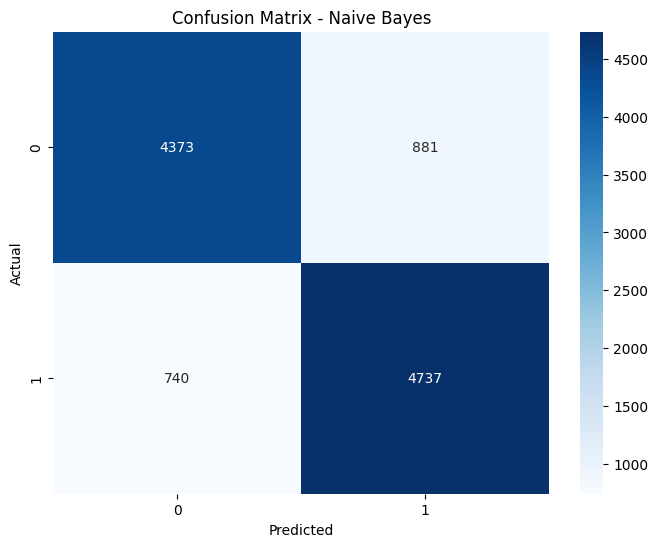

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      5254
           1       0.84      0.86      0.85      5477

    accuracy                           0.85     10731
   macro avg       0.85      0.85      0.85     10731
weighted avg       0.85      0.85      0.85     10731

Number of misclassified examples: 1621

--- Error Analysis: Linear SVM ---


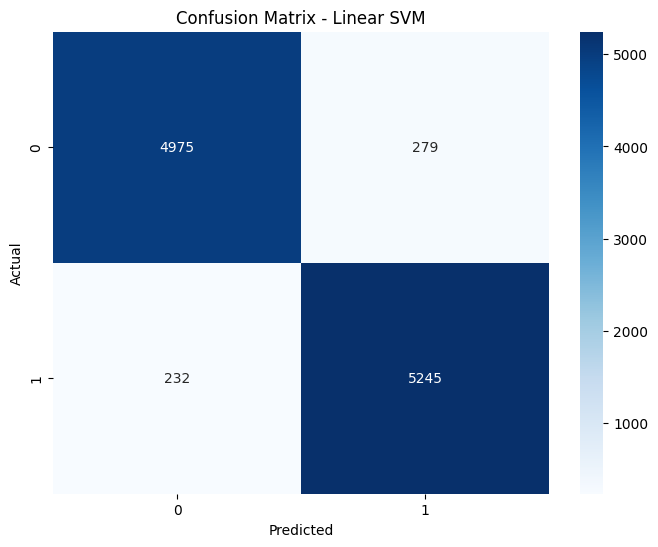

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5254
           1       0.95      0.96      0.95      5477

    accuracy                           0.95     10731
   macro avg       0.95      0.95      0.95     10731
weighted avg       0.95      0.95      0.95     10731

Number of misclassified examples: 511

--- Error Analysis: Random Forest ---


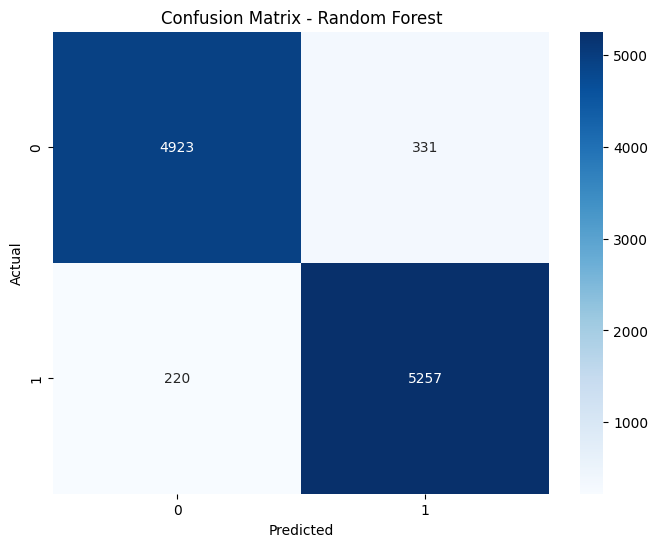

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5254
           1       0.94      0.96      0.95      5477

    accuracy                           0.95     10731
   macro avg       0.95      0.95      0.95     10731
weighted avg       0.95      0.95      0.95     10731

Number of misclassified examples: 551


In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Naive Bayes": nb,
    "Linear SVM": svm,
    "Random Forest": rf,
}

# Assuming X_valid and y_valid are your validation features and labels,
# and X_valid_texts is a DataFrame containing the original text features (title/text) for display

for name, model in models.items():
    print(f"\n--- Error Analysis: {name} ---")
    
    # Predict on validation set
    y_pred = model.predict(X_valid)
    
    # Confusion Matrix
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_valid, y_pred))
    
    # Misclassified examples
    misclassified_idx = [i for i, (true, pred) in enumerate(zip(y_valid, y_pred)) if true != pred]
    print(f"Number of misclassified examples: {len(misclassified_idx)}")
    



### Error Analysis Summary
Logistic Regression and Linear SVM achieved strong performance with around 94-95% accuracy and balanced precision and recall, making them reliable for this classification task. 
Decision Tree showed signs of overfitting, resulting in slightly lower validation accuracy and more misclassifications. Naive Bayes performed the worst due to its strong independence assumptions, leading to more errors. 
Random Forest, an ensemble model, captured nonlinear patterns well and had performance close to Linear SVM. 

Most misclassifications across all models involved ambiguous or noisy data points that are difficult to classify. Common errors were shared among models, indicating inherent challenges in the data. Differences in model errors highlight that ensembles or combining models might improve results. Improving feature representation and cleaning ambiguous samples could further reduce errors. 
Overall, Linear SVM and Random Forest stand out as the best models, balancing accuracy and robustness.

### Model Improvement and Re-Evaluation
Based on the initial evaluation and error analysis, we propose the following improvements for each model to enhance their performance:

Logistic Regression: Tune the regularization strength C to better control overfitting and underfitting.

Decision Tree: Increase the max_depth parameter to reduce underfitting.

Naive Bayes: Use feature selection to remove noisy features that might be hurting performance.

Linear SVM: Tune the regularization parameter C and increase max iterations for convergence.

Random Forest: Increase the number of trees (n_estimators) and limit tree depth (max_depth) to reduce overfitting.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Logistic Regression - Tune regularization parameter C
from sklearn.linear_model import LogisticRegression
lr_tuned = LogisticRegression(max_iter=500, random_state=42)
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(lr_tuned, lr_params, cv=3, scoring='accuracy')
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_

# Decision Tree - Increase max_depth to reduce underfitting
from sklearn.tree import DecisionTreeClassifier
dt_tuned = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [10, 20, 30, None]}
dt_grid = GridSearchCV(dt_tuned, dt_params, cv=3, scoring='accuracy')
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Naive Bayes - Feature selection with SelectKBest to remove noisy features
nb = MultinomialNB()
selector = SelectKBest(chi2, k=1000)  # selecting top 1000 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_valid_selected = selector.transform(X_valid)
nb.fit(X_train_selected, y_train)

# Linear SVM - Tune C and increase max_iter
from sklearn.svm import LinearSVC
svm_tuned = LinearSVC(max_iter=5000, random_state=42)
svm_params = {'C': [0.01, 0.1, 1, 10]}
svm_grid = GridSearchCV(svm_tuned, svm_params, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# Random Forest - Increase n_estimators and limit max_depth to reduce overfitting
from sklearn.ensemble import RandomForestClassifier
rf_tuned = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(rf_tuned, rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate tuned models on training and validation sets
from sklearn.metrics import accuracy_score, f1_score

models_improved = {
    "Logistic Regression": best_lr,
    "Decision Tree": best_dt,
    "Naive Bayes": nb,  # uses selected features
    "Linear SVM": best_svm,
    "Random Forest": best_rf,
}

results_improved = []

for name, model in models_improved.items():
    if name == "Naive Bayes":
        y_train_pred = model.predict(X_train_selected)
        y_valid_pred = model.predict(X_valid_selected)
    else:
        y_train_pred = model.predict(X_train)
        y_valid_pred = model.predict(X_valid)
        
    train_acc = accuracy_score(y_train, y_train_pred)
    valid_acc = accuracy_score(y_valid, y_valid_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    valid_f1 = f1_score(y_valid, y_valid_pred, average='weighted')
    
    results_improved.append({
        "Model": name,
        "Training Accuracy": train_acc,
        "Validation Accuracy": valid_acc,
        "Training F1-Score": train_f1,
        "Validation F1-Score": valid_f1,
    })

import pandas as pd
results_df_improved = pd.DataFrame(results_improved)
print(results_df_improved)
